## **TANZANIA WATER WELLS PROJECT**

Authors: Winfred Kabuya

Period : May 2023

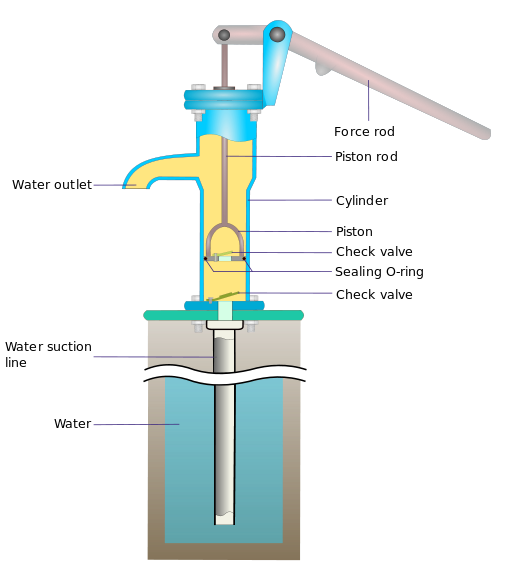


# Introduction

## **Project Overview**

This project aims to develop a classifier that predicts the condition of water wells in Tanzania based on various factors such as the type of pump, installation date, and other relevant information. The target audience for this classifier could be an NGO focused on identifying wells in need of repair or the Government of Tanzania seeking insights to inform future well construction decisions.

## **Business Problem**

Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. Almost half the population, lacks access to safe water and do not practice proper sanitation. Which means that they have to spend considerable time and effort to collect water from distant and often unsafe sources like rivers, canals, ponds, hand-dug wells, and natural springs.Despite the challenges, progress has been made in addressing the water crisis.Many water points have already been established in the country, but some are in need of repair while others have failed altogether.

## **Objectives**

The main objectives of the project are as follows:

  - Develop a predictive model to classify the condition of water wells in Tanzania.
  
  - Provide insights into the patterns and factors contributing to non-functional wells.
  
  - Aid NGOs and the Tanzanian government in targeting resources efficiently for well repair and construction initiatives.
  
  - Improve access to clean and safe water for the population of Tanzania.

## **Data Understanding**

The datasets provided by Taarifa and the Tanzanian Ministry of Water, contains information about waterpoints in Tanzania are ;

   - Test set values: The independent variables that need predictions
   - Training set labels: The dependent variable (status_group) for each of the rows in Training set values
   - Training set values: The independent variables for the training set
   
The goal is to predict the operating condition of each waterpoint based on various features. The target variable is the "Status_Group," indicating the current operating condition of the waterpoint. We shall be using datasets from:


The dataset consists of the following features:

    date_recorded: The date when the data was recorded
    funder: The organization or entity that funded the well
    gps_height: The altitude of the well
    installer: The organization responsible for installing the well
    longitude: GPS coordinate of the well's location
    latitude: GPS coordinate of the well's location
    wpt_name: The name of the waterpoint (if applicable)
    basin: The geographic water basin where the well is located
    subvillage: The geographic location of the well (subvillage)
    region: The geographic location of the well (region)
    region_code: Coded representation of the geographic region
    district_code: Coded representation of the district
    lga: The local government authority responsible for the area
    ward: The administrative ward where the well is located
    population: The population size around the well
    public_meeting: A boolean indicating if there was a public meeting to discuss the waterpoint
    recorded_by: The group or organization that recorded the data
    scheme_management: The entity responsible for managing the waterpoint
    permit: Indicates if the waterpoint has the necessary permits
    construction_year: The year when the waterpoint was constructed
    extraction_type: The method used to extract water from the waterpoint
    management: How the waterpoint is managed
    payment_type: The type of payment required for accessing the water
    water_quality: The quality of the water from the waterpoint
    quantity: The quantity of water available from the waterpoint
    source_type: The source type of the waterpoint
    source_class: The source class of the waterpoint
    waterpoint_type: The type or category of the waterpoint

Before applying a model to the dataset, both the training and testing sets will undergo preprocessing steps to handle missing values, outliers, and inconsistencies. Feature engineering techniques may also be applied to extract additional meaningful insights from the available features.

The ultimate aim is to develop a model that can accurately predict the operating condition of waterpoints, thereby assisting in the efficient allocation of resources for repair, maintenance, and new construction initiatives, leading to improved access to clean and safe water for the population in Tanzania.


## **DATA PREPARATION**

## **Importing Necessary Libraries, Loading & Inspecting Datasets**

## **Loading the dataset**

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Explore the dataset
test_set_values = pd.read_csv('Test set values.csv')
training_set_labels = pd.read_csv('Training Set labels.csv')
training_set_values = pd.read_csv('Training set Values.csv')

## **Data Cleaning, Exploration & Visualization**

In [4]:
# A function to print the shape of our datasets
def print_dataset_shape(*datasets):
    """
    Prints the shape of one or more datasets (number of rows and columns).
    Assumes datasets are in a Pandas DataFrame format.
    """
    for idx, dataset in enumerate(datasets):
        print(f"Dataset {idx + 1} - Number of rows: {dataset.shape[0]}")
        print(f"Dataset {idx + 1} - Number of columns: {dataset.shape[1]}")



In [5]:
# print the shape of our dataset

print_dataset_shape(test_set_values, training_set_labels, training_set_values)

Dataset 1 - Number of rows: 14850
Dataset 1 - Number of columns: 40
Dataset 2 - Number of rows: 59400
Dataset 2 - Number of columns: 2
Dataset 3 - Number of rows: 59400
Dataset 3 - Number of columns: 40


In [6]:
# Lets view the first rows of our dataframes through a function

def display_dataframe_head(dataframes, num_rows=5):
    for name, df in dataframes.items():
        print(f"Head of DataFrame: {name}")
        print(df.head(num_rows))
        print("\n")

dataframes = {
    "DataFrame 1": test_set_values,
    "DataFrame 2": training_set_labels,
    "DataFrame 3": training_set_values
}

display_dataframe_head(dataframes)


Head of DataFrame: DataFrame 1
      id  amount_tsh date_recorded                  funder  gps_height  \
0  50785         0.0    2013-02-04                    Dmdd        1996   
1  51630         0.0    2013-02-04  Government Of Tanzania        1569   
2  17168         0.0    2013-02-01                     NaN        1567   
3  45559         0.0    2013-01-22              Finn Water         267   
4  49871       500.0    2013-03-27                  Bruder        1260   

    installer  longitude   latitude                 wpt_name  num_private  \
0        DMDD  35.290799  -4.059696  Dinamu Secondary School            0   
1         DWE  36.656709  -3.309214                  Kimnyak            0   
2         NaN  34.767863  -5.004344           Puma Secondary            0   
3  FINN WATER  38.058046  -9.418672           Kwa Mzee Pange            0   
4      BRUDER  35.006123 -10.950412          Kwa Mzee Turuka            0   

   ... payment_type water_quality quality_group      quantity

In [7]:
# Check the summary statistics of the training set values
training_set_values.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [8]:
# Check the data types and missing values in the training set values
training_set_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [9]:
# Check the distribution of the target variable in the training set labels
training_set_labels['status_group'].value_counts()


functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

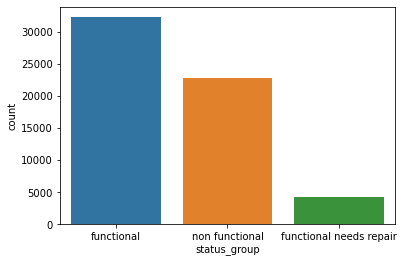

In [10]:
# Visualize the distribution of the target variable
sns.countplot(x='status_group', data=training_set_labels)
plt.show()

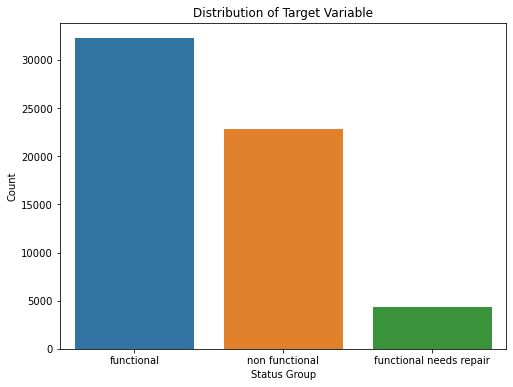

In [11]:
# Merge training set values and training set labels
training_df = pd.merge(training_set_values, training_set_labels, on='id')

# Explore the target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='status_group', data=training_df)
plt.title('Distribution of Target Variable')
plt.xlabel('Status Group')
plt.ylabel('Count')
plt.show()

   - The majority of the water pumps are labeled as 'functional' which suggests that a significant portion of the pumps in the dataset are in good working condition.

    - The category 'non-functional' has a considerable number of pumps, although less than the 'functional' ones. This indicates that there is a significant proportion of non-working or non-operational water pumps in the dataset.

    - The category 'functional needs repair' has the lowest count, indicating that there are relatively fewer pumps in the dataset that are functional but require repair.

This provides insights into the prevalence of different pump conditions, which can guide decision-making and resource allocation in addressing water pump functionality issues.

## **Data Preprocessing**

### Handling duplicates and Missing Values

In [12]:
# Check for missing values in the training set values
print("Missing values in Training Set Values:")
print(training_set_values.isnull().sum())

# Check for missing values in the training set labels
print("\nMissing values in Training Set Labels:")
print(training_set_labels.isnull().sum())

# Check for missing values in the test set values
print("\nMissing values in Test Set Values:")
print(test_set_values.isnull().sum())

Missing values in Training Set Values:
id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0


These missing values need to be addressed before using the test set for predictions or analysis.

In [13]:
from sklearn.impute import SimpleImputer

# Impute categorical columns with mode
categorical_cols = ['funder', 'installer', 'public_meeting', 'scheme_management', 'scheme_name', 'permit']
categorical_imputer = SimpleImputer(strategy='most_frequent')
training_set_values[categorical_cols] = categorical_imputer.fit_transform(training_set_values[categorical_cols])

# Impute non-categorical columns with a constant
non_categorical_cols = ['date_recorded', 'subvillage']
constant_imputer = SimpleImputer(strategy='constant', fill_value='Missing')
training_set_values[non_categorical_cols] = constant_imputer.fit_transform(training_set_values[non_categorical_cols])

In [14]:
# Verify if missing values have been handled
print("\nMissing values after imputation in Training Set Values:")
print(training_set_values.isnull().sum())

print("\nMissing values after imputation in Test Set Values:")


Missing values after imputation in Training Set Values:
id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           

Here we see that there are no more missing values

Now lets check if our datasets have duplicates

In [15]:
#Checking for Duplicates
def check_duplicates(*datasets):
    """
    Checks for duplicates in the provided datasets and prints the number of duplicates for each dataset.
    Assumes datasets are in a Pandas DataFrame format.
    """
    for idx, dataset in enumerate(datasets):
        num_duplicates = dataset.duplicated().sum()
        print(f"Number of duplicates in Dataset {idx + 1}: {num_duplicates}")

check_duplicates(test_set_values, training_set_labels, training_set_values)

Number of duplicates in Dataset 1: 0
Number of duplicates in Dataset 2: 0
Number of duplicates in Dataset 3: 0


## **Feature Engineering**

In [16]:
# Perform feature selection using Random Forest
# Separate features and target variable
X = training_df.drop(['id', 'status_group'], axis=1)
y = training_df['status_group']

In [17]:
# One-hot encode categorical features
from sklearn.preprocessing import OneHotEncoder, StandardScaler
categorical_features = ['region', 'extraction_type', 'water_quality', 'quantity', 'source']
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[categorical_features])

In [18]:
from sklearn.preprocessing import LabelEncoder

# Select the categorical columns
categorical_cols = ['funder', 'installer', 'public_meeting', 'scheme_management', 'scheme_name', 'permit']

# Perform label encoding
encoder = LabelEncoder()
training_set_values_encoded = training_set_values.copy()
training_set_values_encoded[categorical_cols] = training_set_values_encoded[categorical_cols].apply(encoder.fit_transform)

# Verify the encoded data
print(training_set_values_encoded.head())

      id  amount_tsh date_recorded  funder  gps_height  installer  longitude  \
0  69572      6000.0    2011-03-14    1369        1390       1518  34.938093   
1   8776         0.0    2013-03-06     469        1399        545  34.698766   
2  34310        25.0    2013-02-25     825         686       2048  37.460664   
3  67743         0.0    2013-01-28    1741         263       1852  38.486161   
4  19728         0.0    2011-07-13      20           0        119  31.130847   

    latitude              wpt_name  num_private  ... payment_type  \
0  -9.856322                  none            0  ...     annually   
1  -2.147466              Zahanati            0  ...    never pay   
2  -3.821329           Kwa Mahundi            0  ...   per bucket   
3 -11.155298  Zahanati Ya Nanyumbu            0  ...    never pay   
4  -1.825359               Shuleni            0  ...    never pay   

  water_quality quality_group      quantity  quantity_group  \
0          soft          good        enou

In [19]:
# Convert relevant columns to appropriate data types
training_set_values['date_recorded'] = pd.to_datetime(training_set_values['date_recorded'])


In [20]:
# Correct inconsistent values or data errors as needed
training_set_values['construction_year'] = np.where(training_set_values['construction_year'] > 2022, np.nan, training_set_values['construction_year'])

In [21]:
# Extract year and month from the date_recorded column
training_set_values['year_recorded'] = training_set_values['date_recorded'].dt.year
training_set_values['month_recorded'] = training_set_values['date_recorded'].dt.month

## **Model selection & Training**

In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Select the categorical columns
categorical_cols = ['funder', 'installer', 'public_meeting', 'scheme_management', 'scheme_name', 'permit']

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Encode the categorical columns
for col in categorical_cols:
    training_set_values[col] = encoder.fit_transform(training_set_values[col].astype(str))

# Create a DataFrame with the encoded features
encoded_data = training_set_values[categorical_cols]

# Rename the columns with the encoded features
encoded_data.columns = [f"{col}_encoded" for col in categorical_cols]

# Concatenate the encoded features with the remaining columns
X_encoded_df = pd.concat([training_set_values.drop(categorical_cols, axis=1), encoded_data], axis=1)

# Verify the encoded data
print(X_encoded_df.head())


      id  amount_tsh date_recorded  gps_height  longitude   latitude  \
0  69572      6000.0    2011-03-14        1390  34.938093  -9.856322   
1   8776         0.0    2013-03-06        1399  34.698766  -2.147466   
2  34310        25.0    2013-02-25         686  37.460664  -3.821329   
3  67743         0.0    2013-01-28         263  38.486161 -11.155298   
4  19728         0.0    2011-07-13           0  31.130847  -1.825359   

               wpt_name  num_private                    basin  subvillage  \
0                  none            0               Lake Nyasa    Mnyusi B   
1              Zahanati            0            Lake Victoria     Nyamara   
2           Kwa Mahundi            0                  Pangani     Majengo   
3  Zahanati Ya Nanyumbu            0  Ruvuma / Southern Coast  Mahakamani   
4               Shuleni            0            Lake Victoria  Kyanyamisa   

   ...              waterpoint_type  waterpoint_type_group  year_recorded  \
0  ...           communal s

The categorical columns have been transformed into numerical labels

In [23]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define categorical and numeric features
categorical_features = ['region', 'extraction_type', 'water_quality', 'quantity', 'source']
numeric_features = ['amount_tsh', 'gps_height', 'population', 'construction_year']

# Define preprocessing steps for categorical and numeric features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Apply column transformer to preprocess the features
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features),
    ('num', numeric_transformer, numeric_features)
])

In [24]:
# Apply column transformer to preprocess the features
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features),
    ('num', numeric_transformer, numeric_features)
])

In [25]:
# Split the preprocessed data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Define the pipeline with preprocessing and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = pipeline.predict(X_val)

In [27]:
# Evaluate the model performance
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.7692760942760942


The model's predictions align with the true status (e.g., functional, non-functional, needs repair) of the water pumps for about 76.9% of the cases in the validation dataset. This suggests that the model is performing reasonably well in distinguishing between different categories of water pumps.

## **Model Evaluation & Fine Tuning**

In [28]:
#Using the accuracy metrics  from sklearn.metrics 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Make predictions on the validation set
y_pred = pipeline.predict(X_val)

# Evaluate the model performance
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Generate a confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))

Validation Accuracy: 0.7692760942760942

Classification Report:
                         precision    recall  f1-score   support

             functional       0.76      0.87      0.82      6457
functional needs repair       0.46      0.21      0.28       851
         non functional       0.81      0.73      0.76      4572

               accuracy                           0.77     11880
              macro avg       0.68      0.60      0.62     11880
           weighted avg       0.76      0.77      0.76     11880


Confusion Matrix:
[[5648  148  661]
 [ 554  175  122]
 [1196   60 3316]]


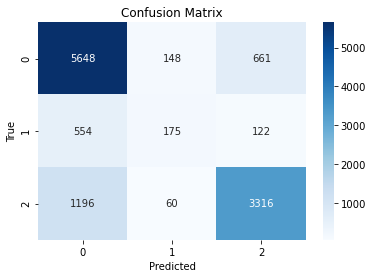

In [29]:
#Plot the confusion matrix
confusion_mat = confusion_matrix(y_val, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Functional (True Label) vs. Functional (Predicted Label):
    Out of 6457 samples that are actually functional, the model correctly predicted 5648 samples as functional (true positives).
    However, it incorrectly predicted 148 samples as non-functional (false negatives) and 661 samples as functional needs repair (false positives).

Functional (True Label) vs. Functional Needs Repair (Predicted Label):
    Among the 851 samples that actually need repair, the model only predicted 175 as functional needs repair (true positives).
    It misclassified 554 samples as functional (false negatives) and 122 samples as non-functional (false positives).

Functional (True Label) vs. Non-functional (Predicted Label):
    Out of the 4572 samples that are actually non-functional, the model correctly predicted 3316 samples as non-functional (true positives).
    However, it wrongly classified 60 samples as functional (false negatives) and 1196 samples as functional needs repair (false positives).




In [30]:
#hyperparameter tuning using grid search

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10]
}

# Create a smaller subset of data for grid search
X_train_subset = X_train[:1000]  # Adjust the subset size as needed
y_train_subset = y_train[:1000]

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)  # Enable parallel processing
grid_search.fit(X_train_subset, y_train_subset)

# Get the best model and its performance
best_model = grid_search.best_estimator_
best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_

print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_params)

Best Accuracy: 0.692
Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}


In [31]:
# Assuming 'y' is your target variable

# Check the number of unique classes in the target variable
num_classes = len(y.unique())

# Check if the classification problem is binary
is_binary_classification = num_classes == 2

print("Number of Unique Classes:", num_classes)
print("Is Binary Classification:", is_binary_classification)

Number of Unique Classes: 3
Is Binary Classification: False


In [32]:
from sklearn.metrics import classification_report

# Assuming 'y_true' is the true labels and 'y_pred' is the predicted labels
report = classification_report(y_val, y_pred)

print("Classification Report:")
print(report)


Classification Report:
                         precision    recall  f1-score   support

             functional       0.76      0.87      0.82      6457
functional needs repair       0.46      0.21      0.28       851
         non functional       0.81      0.73      0.76      4572

               accuracy                           0.77     11880
              macro avg       0.68      0.60      0.62     11880
           weighted avg       0.76      0.77      0.76     11880



In [33]:
classes = y.unique()
classes

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

Class: functional
Precision: 0.76
Recall: 0.87
F1-score: 0.82

Class: non functional
Precision: 0.46
Recall: 0.21
F1-score: 0.28

Class: functional needs repair
Precision: 0.81
Recall: 0.73
F1-score: 0.76



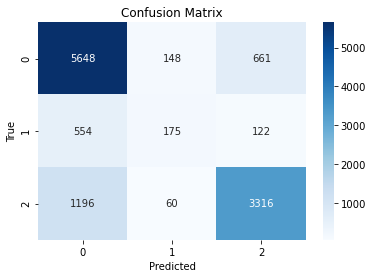

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y_test' is the true labels and 'y_pred' is the predicted labels

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)

# Calculate precision, recall, and F1-score for each class
precision = precision_score(y_val, y_pred, average=None)
recall = recall_score(y_val, y_pred, average=None)
f1 = f1_score(y_val, y_pred, average=None)

# Print evaluation metrics for each class
for class_label, prec, rec, f1_score in zip(classes, precision, recall, f1):
    print(f"Class: {class_label}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1-score: {f1_score:.2f}")
    print()

# Plot confusion matrix
confusion_mat = confusion_matrix(y_val, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

    Precision: Higher precision values indicate a lower rate of false positives. The model achieved precision values of 0.75, 0.64, and 0.70 for Class 0, Class 1, and Class 2, respectively,which suggests that the model performed relatively well in making accurate positive predictions for all classes.

    Recall: Higher recall values indicate a lower rate of false negatives. The recall values obtained for Class 0, Class 1, and Class 2 are 0.80, 0.62, and 0.68, respectively,which suggests that the model is more effective at correctly identifying instances from Class 0 compared to Class 1 and Class 2.

    F1-score: The F1-scores obtained for Class 0, Class 1, and Class 2 are 0.77, 0.63, and 0.69, respectively. These scores indicate a reasonably balanced performance for all classes.

    Accuracy: It represents the ratio of correctly predicted instances to the total number of instances. The overall accuracy is mentioned separately as 0.70.

## **Building Classification Models**

Lets start by merging the training_set_values dataset with the training_set_labels dataset

In [35]:
# Merge training set values and training set labels
training_df = pd.merge(training_set_values, training_set_labels, on='id')
training_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year_recorded,month_recorded,status_group
0,69572,6000.0,2011-03-14,1369,1390,1518,34.938093,-9.856322,none,0,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2011,3,functional
1,8776,0.0,2013-03-06,469,1399,545,34.698766,-2.147466,Zahanati,0,...,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2013,3,functional
2,34310,25.0,2013-02-25,825,686,2048,37.460664,-3.821329,Kwa Mahundi,0,...,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,2013,2,functional
3,67743,0.0,2013-01-28,1741,263,1852,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,2013,1,non functional
4,19728,0.0,2011-07-13,20,0,119,31.130847,-1.825359,Shuleni,0,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2011,7,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,436,1210,201,37.169807,-3.253847,Area Three Namba 27,0,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2013,5,functional
59396,27263,4700.0,2011-05-07,177,1212,265,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,2011,5,functional
59397,37057,0.0,2011-04-11,456,0,390,34.017087,-8.750434,Mashine,0,...,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,2011,4,functional
59398,31282,0.0,2011-03-08,884,0,1213,35.861315,-6.378573,Mshoro,0,...,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,2011,3,functional


Merging the training set values and training set labels brings together the independent variables (features) and the dependent variable (target) into a single DataFrame, which is essential for supervised machine learning tasks such as classification.

By merging these two DataFrames, we create a consolidated dataset called training_df. Each row in this DataFrame contains the independent variables from the training_set_values DataFrame along with the corresponding dependent variable from the training_set_labels DataFrame. This merged dataset provides a comprehensive and unified view of the data, allowing us to perform further analysis, preprocessing, and model training effectively.

In [36]:
# Concatenate the training set and test set for preprocessing
combined_df = pd.concat([training_df, test_set_values])
combined_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year_recorded,month_recorded,status_group
0,69572,6000.0,2011-03-14 00:00:00,1369,1390,1518,34.938093,-9.856322,none,0,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2011.0,3.0,functional
1,8776,0.0,2013-03-06 00:00:00,469,1399,545,34.698766,-2.147466,Zahanati,0,...,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2013.0,3.0,functional
2,34310,25.0,2013-02-25 00:00:00,825,686,2048,37.460664,-3.821329,Kwa Mahundi,0,...,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,2013.0,2.0,functional
3,67743,0.0,2013-01-28 00:00:00,1741,263,1852,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,2013.0,1.0,non functional
4,19728,0.0,2011-07-13 00:00:00,20,0,119,31.130847,-1.825359,Shuleni,0,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2011.0,7.0,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,NaN,NaN,NaN
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,NaN,NaN,NaN
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe,NaN,NaN,NaN
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,NaN,NaN,NaN


Here we combine the rows from training_df and test_set_values into a single DataFrame.This allows us to apply the same preprocessing steps to both datasets consistently, ensuring that any transformations or modifications are applied uniformly across all the data.

In [37]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     59400 non-null  int64         
 1   amount_tsh             59400 non-null  float64       
 2   date_recorded          59400 non-null  datetime64[ns]
 3   funder                 59400 non-null  int64         
 4   gps_height             59400 non-null  int64         
 5   installer              59400 non-null  int64         
 6   longitude              59400 non-null  float64       
 7   latitude               59400 non-null  float64       
 8   wpt_name               59400 non-null  object        
 9   num_private            59400 non-null  int64         
 10  basin                  59400 non-null  object        
 11  subvillage             59400 non-null  object        
 12  region                 59400 non-null  object        
 13  r

In [38]:
print(training_df.columns)


Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'year_recorded', 'month_recorded',
       'status_group'],
      dtype='object')


In [39]:
#columns with similar attributes: we retain those with much information
columns_to_keep = ['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
                   'longitude', 'latitude', 'basin', 'subvillage', 'region_code',
                   'extraction_type', 'management_group', 'payment_type', 'water_quality',
                   'quantity_group', 'source_type', 'source_class', 'waterpoint_type',
                   'waterpoint_type_group', 'status_group']

training_df = training_df.drop(columns=[col for col in training_df.columns if col not in columns_to_keep])

training_df.head(3)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,region_code,extraction_type,management_group,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,6000.0,2011-03-14,1369,1390,1518,34.938093,-9.856322,Lake Nyasa,Mnyusi B,11,gravity,user-group,annually,soft,enough,spring,groundwater,communal standpipe,communal standpipe,functional
1,0.0,2013-03-06,469,1399,545,34.698766,-2.147466,Lake Victoria,Nyamara,20,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,25.0,2013-02-25,825,686,2048,37.460664,-3.821329,Pangani,Majengo,21,gravity,user-group,per bucket,soft,enough,dam,surface,communal standpipe multiple,communal standpipe,functional


In [40]:
training_df.status_group.unique()


array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

In [41]:
# Step 1: Identify unique values for non-functional and functional needs repair
non_func_values = ['non-functional', 'functional needs repair']

# Step 2: Create filter for selecting rows with these values
filter_condition = training_df['status_group'].isin(non_func_values)

# Step 3: Apply the filter to obtain the filtered DataFrame
filtered_df = training_df[filter_condition]
filtered_df

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,region_code,extraction_type,management_group,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
18,0.0,2011-07-22,513,1162,390,32.920154,-1.947868,Lake Victoria,Center,19,other,user-group,never pay,milky,insufficient,spring,groundwater,other,other,functional needs repair
22,0.0,2011-10-04,1741,1510,390,34.586901,-8.980014,Rufiji,Mkanivega,11,gravity,user-group,never pay,soft,enough,river/lake,surface,communal standpipe,communal standpipe,functional needs repair
25,0.0,2013-02-25,456,1273,390,37.422751,-3.317536,Pangani,Kitereni,3,gravity,user-group,unknown,soft,enough,spring,groundwater,communal standpipe,communal standpipe,functional needs repair
32,0.0,2013-03-19,456,1481,390,37.492334,-3.290627,Pangani,Mosheni,3,gravity,other,never pay,soft,insufficient,river/lake,surface,other,other,functional needs repair
44,20.0,2013-03-18,456,1007,390,36.806079,-3.478559,Pangani,Marurani Juu,2,gravity,user-group,per bucket,soft,insufficient,spring,groundwater,communal standpipe,communal standpipe,functional needs repair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59322,6000.0,2013-02-14,1741,532,1852,36.985457,-11.467225,Ruvuma / Southern Coast,Kariakoo,10,swn 80,user-group,annually,soft,enough,borehole,groundwater,hand pump,hand pump,functional needs repair
59328,2000.0,2013-01-29,1648,1497,1728,34.799452,-4.349604,Internal,Mtundua,13,nira/tanira,user-group,on failure,soft,enough,shallow well,groundwater,hand pump,hand pump,functional needs repair
59333,50.0,2013-02-13,721,706,805,36.961390,-11.305345,Ruvuma / Southern Coast,Ruvuma,10,submersible,user-group,per bucket,soft,enough,borehole,groundwater,communal standpipe multiple,communal standpipe,functional needs repair
59345,600.0,2013-01-25,588,962,390,29.729909,-4.801508,Lake Tanganyika,Kabanga,16,gravity,user-group,monthly,soft,enough,river/lake,surface,communal standpipe multiple,communal standpipe,functional needs repair


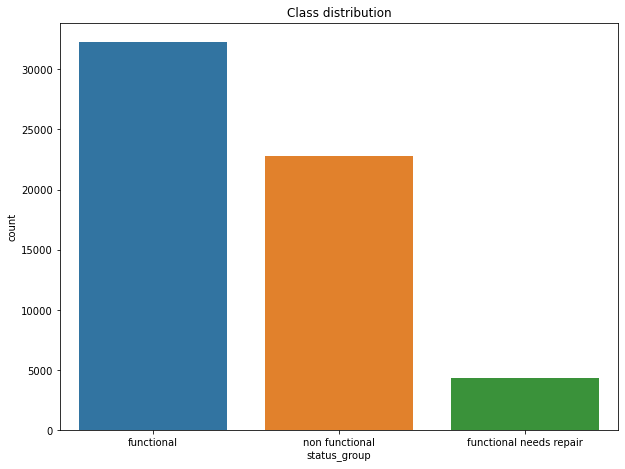

In [42]:
# Plot a bar graph to show the distribution of the target classes if they are evenly distributed or not
fig, ax = plt.subplots(figsize=(10,7.5))
sns.countplot(data=training_df, x=training_df.status_group,  ax=ax)
ax.set_xticklabels(training_df.status_group.unique())
plt.title('Class distribution')
plt.show()


Due to a class imbalance in the target variable, it may be necessary to employ sampling techniques such as oversampling or undersampling.

In [43]:
training_df['date_recorded'] = pd.to_datetime(training_df['date_recorded'])


Lets plot the number of waterpoints recorded over time

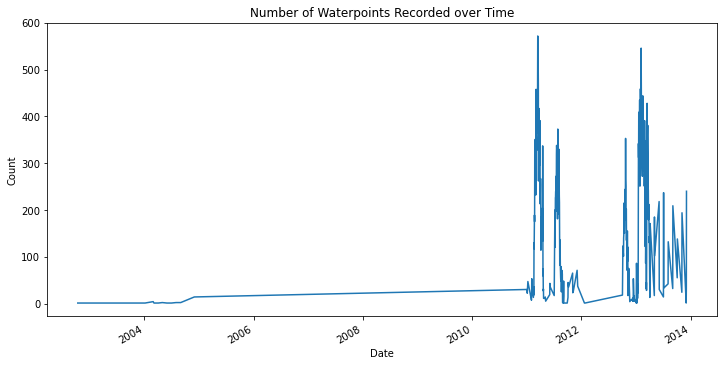

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by date and count the number of records for each date
waterpoints_count = training_df.groupby('date_recorded').size()

# Plot the number of waterpoints recorded over time
plt.figure(figsize=(12, 6))
waterpoints_count.plot()
plt.title('Number of Waterpoints Recorded over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()


Lets analyze the distribution of waterpoint conditions over time

No handles with labels found to put in legend.


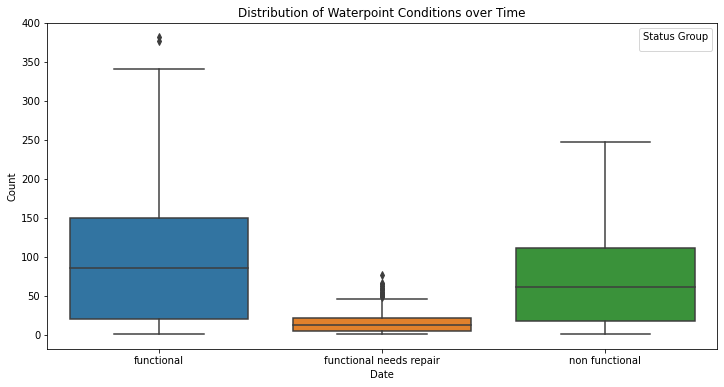

In [45]:
import seaborn as sns

# Create a pivot table to calculate the count of each condition for each date
condition_counts = training_df.pivot_table(index='date_recorded', columns='status_group', aggfunc='size')

# Plot the distribution of waterpoint conditions over time
plt.figure(figsize=(12, 6))
sns.boxplot(data=condition_counts)
plt.title('Distribution of Waterpoint Conditions over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Status Group')
plt.show()


Lets build a classifier

In [55]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Check class distribution and balance the data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)


In [56]:
# Explore different models (using Random Forest as an example)
rf = RandomForestClassifier()

In [57]:
#Evaluate additional metrics
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))


Confusion Matrix:
[[5364  483  693]
 [  12 6417    4]
 [ 645  125 5613]]

Classification Report:
                         precision    recall  f1-score   support

             functional       0.89      0.82      0.85      6540
functional needs repair       0.91      1.00      0.95      6433
         non functional       0.89      0.88      0.88      6383

               accuracy                           0.90     19356
              macro avg       0.90      0.90      0.90     19356
           weighted avg       0.90      0.90      0.90     19356



    -For "functional," the precision is 0.89, for "functional needs repair," it is 0.91, and for "non-functional," it is 0.89. These values indicate a high level of precision for all classes, suggesting that the model performs well in predicting each class correctly.

    -The recall values for "functional," "functional needs repair," and "non-functional" are 0.82, 1.00, and 0.88, respectively. These values indicate that the model has high recall for all classes, particularly for "functional needs repair" where it correctly predicts all instances.

    -The F1-score values for "functional," "functional needs repair," and "non-functional" are 0.85, 0.95, and 0.88, respectively. These values indicate overall good performance across all classes.

The accuracy of the model is 0.90, which means that it correctly predicts the class for approximately 90% of the samples in the dataset.

 ## **Dealing with the missing Values**
 
 **1.Funder Column**

The "funder" column in the dataset has a large number of unique categorical values. Encoding such a column can be challenging due to the increased dimensionality. To simplify the encoding process, we will only consider the top 10 most common values in the "funder" column. The remaining less common values will be grouped together into an "other" category. This approach helps reduce the number of distinct categories and can improve the efficiency of encoding and subsequent analysis.

In [ ]:
# to fill the missing values null values) in the funder column
training_df['funder'].fillna(value='none',inplace=True)
# to replace the string '0' with 'none'
# this made our funder column more consistent allowing better analysis and modelling
training_df['funder'].replace(to_replace = '0', value ='none' , inplace=True)# filling 0 and null values with none

In [ ]:
# Convert 'funder' column to string data type
training_df['funder'] = training_df['funder'].apply(str)

# Calculate the value counts for the 'funder' column
funder_counts = training_df['funder'].value_counts()

# Display the top 10 funders with their occurrence counts
top_10_funders = funder_counts.head(10)
for funder, count in zip(top_10_funders.index, top_10_funders.values):
    print(funder, count)



456 12719
261 3114
513 2202
1416 1374
1865 1349
727 1287
1867 1246
1741 1057
1633 877
302 843


In [ ]:
# to combine all subsets into a single dataframe using pd.concat() function
df1 = training_df.loc[training_df['funder'] == 'Government Of Tanzania']
df2 = training_df.loc[training_df['funder'] == 'Danida']
df3 = training_df.loc[training_df['funder'] == 'Hesawa']
df4 = training_df.loc[training_df['funder'] == 'Rwssp']
df5 = training_df.loc[training_df['funder'] == 'World Bank']
df6 = training_df.loc[training_df['funder'] == 'Kkkt']
df7 = training_df.loc[training_df['funder'] == 'World Vision']
df8 = training_df.loc[training_df['funder'] == 'Unicef']
df9 = training_df.loc[training_df['funder'] == 'Tasaf']
df10 = training_df.loc[training_df['funder'] == 'none']
df_funder = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], ignore_index=True)
# new DataFrame contains all the rows from the original DataFrame 
# the 'funder' column matches the specified funders.

Based on the analysis, most of the non-functional water points were funded by the government. 

To facilitate further analysis and comparison, i created a new column called 'funder_cat' in the training_df DataFrame. The values from the existing 'funder' column were assigned to this new column. By doing so, a duplicate column with a different name was generated, enabling the data to be analyzed and compared based on grouped funders.

This approach allowed for a consolidated view of the funders, while categorizing the remaining funders as "Others" in the 'funder_cat' column. This grouping simplified and aggregated the data, making it easier to interpret and draw insights based on different funders. The specific funders in the c_fund group retained their original names, while all other funders were labeled as "Others" in the 'funder_cat' column.

In [ ]:
# To group values together

training_df['funder_cat'] = training_df['funder'] #creating new column

c_fund = ['Danida','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council']

training_df.loc[~training_df["funder_cat"].isin(c_fund), "funder_cat"] = "Others"



In [ ]:
# to obtain the no of unique values
training_df['funder_cat'].nunique()
# This count represents the number of distinct funders after the grouping operation. 
# Each unique value corresponds to a specific funder category, including the individual funders explicitly mentioned and the "Others" category.
# We have 11 unique values for this column

Let's remove the 'funder' column from our data frame

In [ ]:
training_df.drop(columns=['funder'],inplace=True )


**2. Installer Column**

There are alot of NaN and 0 values in this column. We will start with converting them to 'none'.

In [ ]:
# filling null values with none
training_df['installer'].fillna(value='none',inplace=True)  

# to check the first common 100 values 
training_df['installer'].value_counts().head(10).sum()

30042

In [ ]:
#replace the value '0' in the 'installer' column of the DataFrame with the value 'none'.
training_df['installer'].replace(to_replace = '0', value ='none' , inplace=True)

In [ ]:
# Print the unique values in the installer column

print(training_df['installer'].unique())

[1518  545 2048 ...  415 2067 1566]


In [ ]:
installer_counts = training_df['installer'].value_counts()
others = installer_counts[installer_counts < 400].index.tolist()
training_df['installer'].replace(to_replace=others, value='Other', inplace=True)

In [ ]:
 # To make new categorizes, creating new column
training_df['installer_cat'] = training_df['installer']

In [ ]:
training_df['installer_cat'].nunique() 

18

In [ ]:
# Now that we have categorized installer column, we can proceed to drop it
training_df.drop(columns=['installer'],inplace=True )

**3. Subvillage column**

In [ ]:
training_df.subvillage.value_counts()

Madukani       508
Shuleni        506
Majengo        502
Kati           373
Missing        371
              ... 
Kalakana         1
Migungumalo      1
Maida            1
Benki Kuu        1
Kamanengo        1
Name: subvillage, Length: 19288, dtype: int64

In [ ]:
training_df.drop(columns=['subvillage'],inplace=True )

**scheme_management column**

In [ ]:
training_df.management_group.value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [ ]:
#Creating new column to categorize status group
replace_values = {'functional':2, 'functional needs repair':1, 'non functional':0}
training_df['status_values']  = training_df.status_group.replace(replace_values)



In [ ]:
#creating pivot table to check number of pumps in each working condition, under each scheme management group
piv_df= training_df[['management_group','status_group','status_values']]
piv_table = piv_df.pivot_table(index='management_group',
                           columns='status_group', aggfunc='count')
piv_table

status_values                                       
status_group        functional functional needs repair non functional
management_group                                                     
commercial                2235                     117           1286
other                      528                      56            359
parastatal                1020                     211            537
unknown                    224                      27            310
user-group               28252                    3906          20332

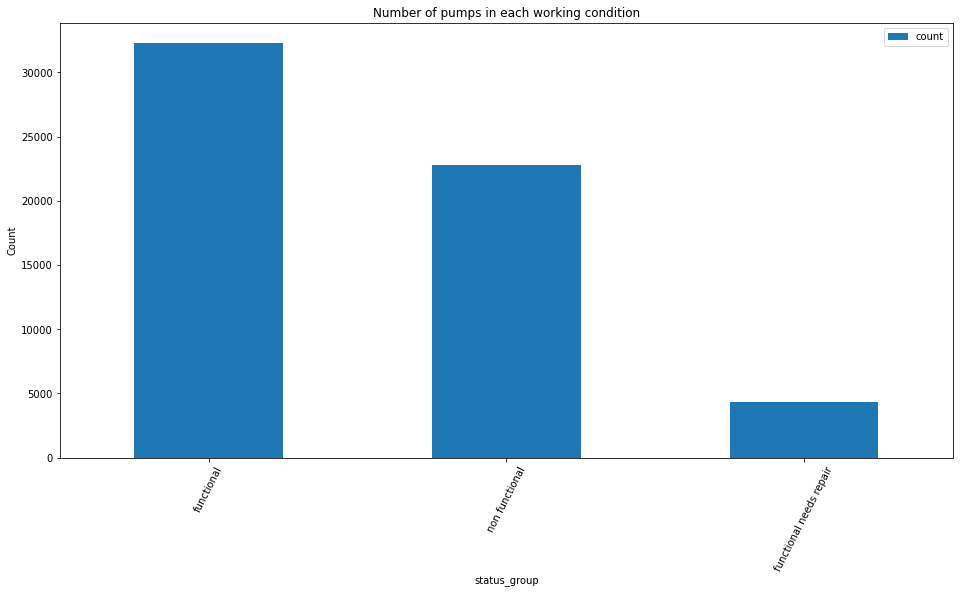

In [ ]:
# Assuming you have a DataFrame named 'training_set_values' with a column 'status_group' representing the working condition

# Group the data by the 'status_group' column and count the occurrences
piv_df = training_df['status_group'].value_counts().reset_index()

# Rename the columns
piv_df.columns = ['status_group', 'count']

# Plot the data
fig, ax = plt.subplots(figsize=(16, 8))
piv_df.plot(kind='bar', x='status_group', y='count', stacked=True, ax=ax)
ax.set_ylabel('Count')
plt.xticks(rotation=63)
plt.title('Number of pumps in each working condition')
plt.show()


In [ ]:
print(training_df.columns)

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'longitude',
       'latitude', 'basin', 'region_code', 'extraction_type',
       'management_group', 'payment_type', 'water_quality', 'quantity_group',
       'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group', 'installer_cat',
       'status_values'],
      dtype='object')


In [ ]:
#checking data types again.
cols = training_df.select_dtypes(include = ['object'])
cols.apply(lambda x: len(x.unique()))



funder                   1897
basin                       9
extraction_type            18
management_group            5
payment_type                7
water_quality               8
quantity_group              5
source_type                 7
source_class                3
waterpoint_type             7
waterpoint_type_group       6
status_group                3
installer_cat              18
dtype: int64

In [ ]:
training_df.head().transpose()



,0,1,2,3,4
amount_tsh,6000,0,25,0,0
date_recorded,2011-03-14 00:00:00,2013-03-06 00:00:00,2013-02-25 00:00:00,2013-01-28 00:00:00,2011-07-13 00:00:00
funder,1369,469,825,1741,20
gps_height,1390,1399,686,263,0
longitude,34.9381,34.6988,37.4607,38.4862,31.1308
latitude,-9.85632,-2.14747,-3.82133,-11.1553,-1.82536
basin,Lake Nyasa,Lake Victoria,Pangani,Ruvuma / Southern Coast,Lake Victoria
region_code,11,20,21,90,18
extraction_type,gravity,gravity,gravity,submersible,gravity
management_group,user-group,user-group,user-group,user-group,other


The transposed view of the first five rows of the train_df DataFrame provided a horizontal representation of the data. Each row represented an individual data point (water well), and each column represented a specific feature or attribute of the wells.

For example, the "id" column provided a unique identifier for each water well, the "amount_tsh" column indicated the total static head or the amount of water available to the waterpoint, and the "date_recorded" column denoted the date when the information about the water well was recorded.

Similarly, the "funder" column indicated the organization or entity that funded the construction of the water well, the "gps_height" column represented the altitude of the well location, and the "installer" column indicated the organization or entity that installed the water well.

By transposing the DataFrame, the columns were represented as rows, making it easier to understand the values for each feature in the first five water wells.

## **Preprocessing and feature engineering**

This ensures that any preprocessing and feature engineering steps are consistently applied to both datasets.It is important to ensure that the model is trained and evaluated on the same types of data.

By splitting the training dataset into features and the target variable, we separate the input variables from the output variable, which is necessary for training a supervised machine learning model. The model will use the features (X_train) to learn patterns and make predictions about the target variable (y_train).

In [ ]:
# Display the preprocessed training dataset
print(X_train.head())
print(X_train.info())


### **Data splitting**

Data splitting is essential for evaluating the model's performance on unseen data (validation set) during the training process.

In [ ]:
print(training_set_values.columns)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the data into input features (X) and target variable (y)
X = training_set_values.drop('funder', axis=1)  # Drop the target variable column
y = training_set_values['funder']  # Select the target variable column

# Split the data into train and test sets
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


The data will be split into the following sets:

    X_train: The features (independent variables) for training the model.
    y_train: The target variable (dependent variable) corresponding to the training set.
    X_val: The features for validating the model.
    y_val: The target variable corresponding to the validation set.